In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
import mplfinance as mpf

AAPL = yf.download("AAPL", start="2023-01-01", end="2023-08-01", interval='1d')


[*********************100%%**********************]  1 of 1 completed


In [52]:
def plot(df):
    apd = [
        mpf.make_addplot(df['BuySignal'], type='scatter', markersize=200,marker='^'),
        mpf.make_addplot(df['SellSignal'], type='scatter', markersize=200,marker='v', color='orange')
    ]
    mpf.plot(df, type='candle', volume=True, mav=(5, 21), figsize=(22, 10), addplot=apd)

In [20]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    n1 = 5
    n2 = 21

    def init(self):
        close = self.data.Close
        self.sma1 = self.I(SMA, close, self.n1)
        self.sma2 = self.I(SMA, close, self.n2)

    def next(self):
        if crossover(self.sma1, self.sma2):
            self.buy()
        elif crossover(self.sma2, self.sma1):
            self.sell()


bt = Backtest(AAPL, SmaCross, cash=1000, commission=0, exclusive_orders=True)

output = bt.run()
output

Start                     2023-01-03 00:00:00
End                       2023-07-31 00:00:00
Duration                    209 days 00:00:00
Exposure Time [%]                   74.305556
Equity Final [$]                  1219.900055
Equity Peak [$]                   1219.900055
Return [%]                          21.990005
Buy & Hold Return [%]               57.072038
Return (Ann.) [%]                   41.601365
Volatility (Ann.) [%]               21.669104
Sharpe Ratio                         1.919847
Sortino Ratio                        4.915886
Calmar Ratio                         5.284302
Max. Drawdown [%]                   -7.872632
Avg. Drawdown [%]                   -1.769853
Max. Drawdown Duration       29 days 00:00:00
Avg. Drawdown Duration        9 days 00:00:00
# Trades                                    2
Win Rate [%]                             50.0
Best Trade [%]                      27.676479
Worst Trade [%]                     -3.960457
Avg. Trade [%]                    

In [42]:
output._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,-6,37,45,147.710007,153.559998,-35.099945,-0.039605,2023-02-27,2023-03-09,10 days
1,6,45,143,153.559998,196.059998,255.000000,0.276765,2023-03-09,2023-07-31,144 days


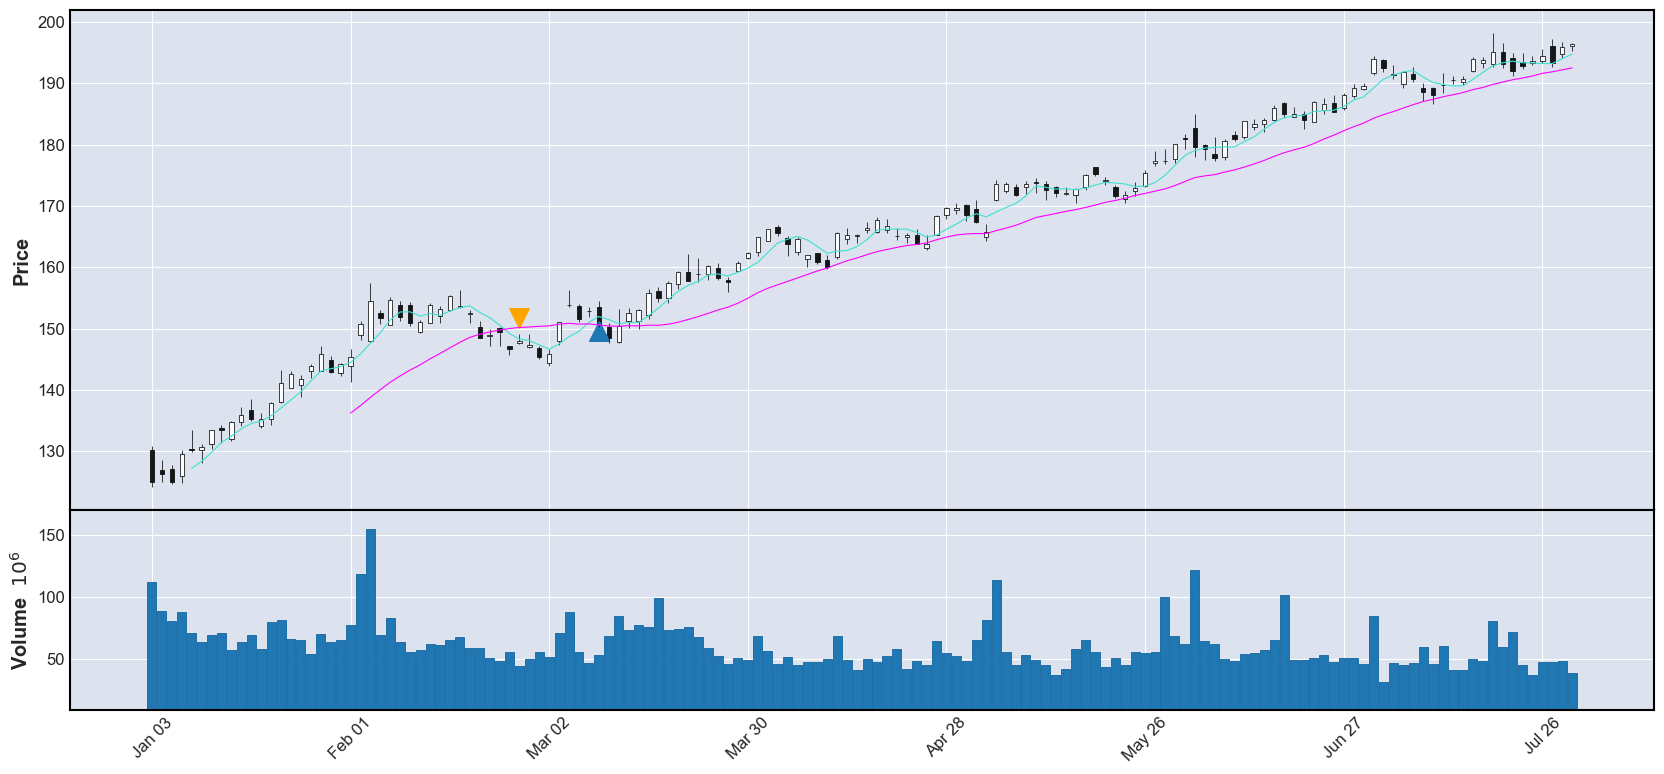

In [59]:
s = output._trades[['EntryTime', 'EntryPrice', 'Size']]
s.set_index('EntryTime', inplace=True)

AAPL['BuySignal'] = s['EntryPrice'].where(s['Size'] > 0)  - 4          
AAPL['SellSignal'] = s['EntryPrice'].where(s['Size'] < 0) + 4


plot(AAPL)


In [18]:
output._trades

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,-6,39,50,146.830002,152.160004,-31.980011,-0.036300,2023-03-01,2023-03-16,15 days
1,6,50,143,152.160004,196.059998,263.399963,0.288512,2023-03-16,2023-07-31,137 days


In [ ]:
mfpData = AAPL[AAPL.index > '2023-05-01']
mpf.plot(mfpData, type='candle', hlines=[180])